## Project Report: Correlation Analysis between Vehicle sales and Co2 Emission in USA untill year 2015

# Introduction

This project helps to investigate between Number of vehicles sold in USA from 1982 to 2015. The emission of Co2 impact various factors like greenhouse effect, trapping more heat in the Earth's atmosphere, leading to global temperature rise which can lead to severe weather events such as hurricanes, droughts, heatwaves, and heavy rainfall. This report will help you to analyse how the sales of vehicles leads to the increase in carbon emissions.

# Methods

# Data Source
1. Vehicle Sales data of USA: The data is taken from Kaggle, this dataset is a open source MIT licensed. The link for dataset is [Vehicle sales data](https://www.kaggle.com/datasets/syedanwarafridi/vehicle-sales-data).
2. Co2 Emission data of USA: The data is taken from kaggle, this dataset is a open source dataset. The link for dataset is [Co_2_emission](https://www.kaggle.com/datasets/soheiltehranipour/co2-dataset-in-usa)

# Data Pipeline

The data pipeline has the following components:

# Extraction

The data extraction process involves of extracting data from kaggle. The python code is used to download the data from the kaggle. Here the extracted data is stored into a sqlite database in form of tables.

# Transformation

The data transformation process includes of following steps:

1. Filtering out necessary columns: The Vehicle sales data consisted of various other columns. Hence the unnecessary columns where filtered out from the dataset.   

2. Checking the datatypes: Checking datatypes of columns before storing them it finally into database is the most essential as it may cause errors during the interpretations with data. 

3. Renaming columns: The columns are renamed such that they are more interpretable.

4. Handling Missing values: The missing values can effect the quality of data and make it unusable. Hence, to ensure the usability of data the missing and null values were dropped.

All of the above transformation steps ensure that the data is clean and ready for analysis. 


# Results and Limitations

In [1]:
import sqlite3
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
conn = sqlite3.connect("..\\data\\data.sqlite")

In [3]:
vehicle_data =  pd.read_sql_query("SELECT * FROM Vehicle_sales_data", conn)

In [4]:
vehicle_data

,Year,Number of Vehicles sold
0,1985,10
1,1986,11
2,1987,8
3,1988,11
4,1989,20
5,1990,49
6,1991,67
7,1992,132
8,1993,205
9,1994,392


(array([1980., 1985., 1990., 1995., 2000., 2005., 2010., 2015., 2020.]),
 [Text(1980.0, 0, '1980'),
  Text(1985.0, 0, '1985'),
  Text(1990.0, 0, '1990'),
  Text(1995.0, 0, '1995'),
  Text(2000.0, 0, '2000'),
  Text(2005.0, 0, '2005'),
  Text(2010.0, 0, '2010'),
  Text(2015.0, 0, '2015'),
  Text(2020.0, 0, '2020')])

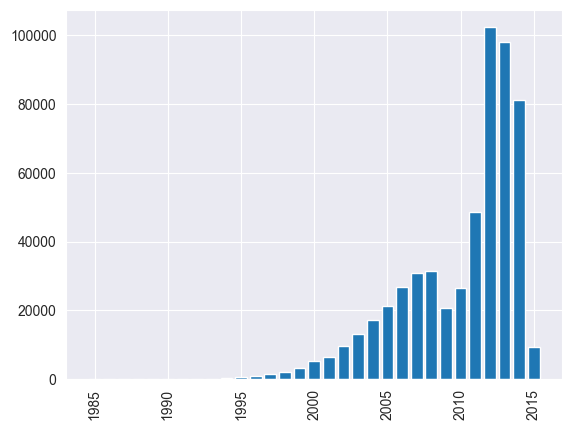

In [5]:
plt.figure()
plt.bar( vehicle_data['Year'],vehicle_data['Number of Vehicles sold'])
plt.xticks(rotation=90)

# Observation
From this graph we can conclude that in year 2012 the number of vehicle sold were more. We can also observe that the trend increased from year 1995 and went up till 2008 and then had an down trend till 2010 and rise up with a increasing trend untill 2012 

In [6]:
co2_data = pd.read_sql_query("SELECT * FROM co2_emission", conn)

In [7]:
co2_data

,Year,Co2_emission
0,1985,1367.400
1,1986,1357.485
2,1987,1426.752
3,1988,1491.808
4,1989,1518.843
5,1990,1547.564
6,1991,1548.180
7,1992,1569.565
8,1993,1632.519
9,1994,1638.781


(array([1980., 1985., 1990., 1995., 2000., 2005., 2010., 2015., 2020.]),
 [Text(1980.0, 0, '1980'),
  Text(1985.0, 0, '1985'),
  Text(1990.0, 0, '1990'),
  Text(1995.0, 0, '1995'),
  Text(2000.0, 0, '2000'),
  Text(2005.0, 0, '2005'),
  Text(2010.0, 0, '2010'),
  Text(2015.0, 0, '2015'),
  Text(2020.0, 0, '2020')])

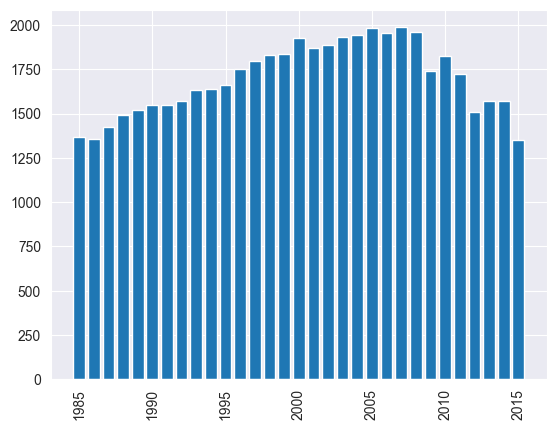

In [8]:
plt.figure()
plt.bar( co2_data['Year'],co2_data['Co2_emission'])
plt.xticks(rotation=90)

In [9]:
merged_data = pd.merge(vehicle_data, co2_data, on='Year')

In [10]:
correlation_matrix = merged_data.corr(numeric_only=True)

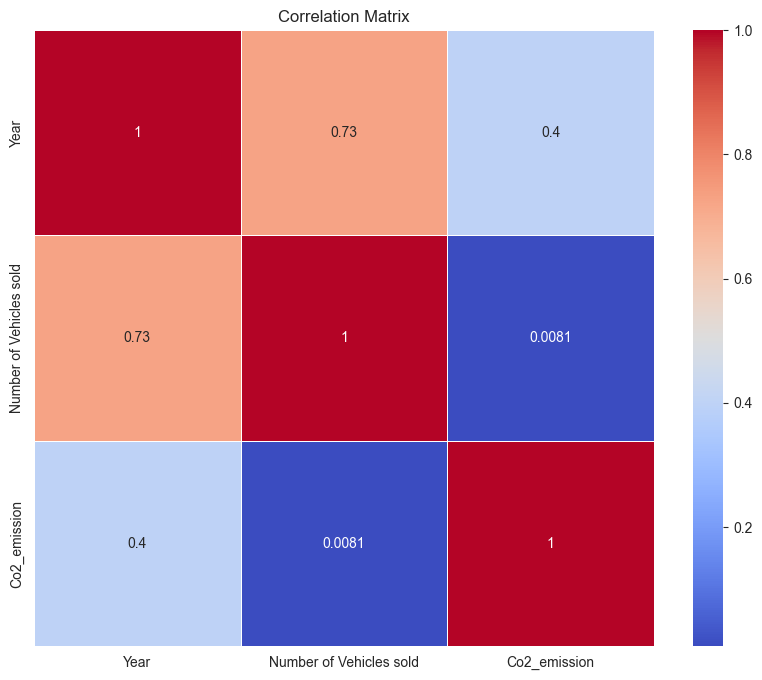

In [11]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()